# Student Information
#### Name: 高睿駿

#### Student ID: 711233108

#### GitHub ID: ThomasKAO0514

# S2

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline

In [4]:
# obtain the documents containing the categories provided
df = pd.read_csv('/content/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
df['category'] = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})

In [5]:
df[0:2]

sentiment                                            comment  category
0  not nostalgia  He was a singer with a golden voice that I lov...         0
1      nostalgia  The mist beautiful voice ever I listened to hi...         1

In [6]:
print(df.columns)


Index(['sentiment', 'comment', 'category'], dtype='object')


In [7]:
len(df)

1500

In [8]:
print(df.columns[0])

sentiment


In [9]:
print(df['sentiment'])

0       not nostalgia
1           nostalgia
2           nostalgia
3       not nostalgia
4           nostalgia
            ...      
1495    not nostalgia
1496    not nostalgia
1497    not nostalgia
1498        nostalgia
1499        nostalgia
Name: sentiment, Length: 1500, dtype: object


# **>>> Exercise 1 (Watch Video):**

#### In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [10]:
for text in df.comment[0:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


# **3. Data Transformation**

## 3.1 Converting Dictionary into Pandas Dataframe

In [11]:
#DATA TRANSFORMATION
import pandas as pd
import data_mining_helpers as dmh
#Here is the data frame, with the columns made by the sentences, scores, the category assigned and the respective name of the site where the reviews where done.
X = df
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  
0            0  
1            1  
2            1  
3            0  
4            1  
...        ...  
1495         0  
1496         0  
1497         0  
1498         1  
1499         1  

[1500 rows x 3 columns]

In [12]:
len(X)

1500

In [13]:
for t in X['comment'][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [14]:
X[0:10]

sentiment                                            comment  category
0  not nostalgia  He was a singer with a golden voice that I lov...         0
1      nostalgia  The mist beautiful voice ever I listened to hi...         1
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0
4      nostalgia  listening to his songs reminds me of my mum wh...         1
5      nostalgia  Every time I heard this song as a child, I use...         1
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1
8  not nostalgia           Wherever you  are you always in my heart         0
9  not nostalgia  Elvis will always be number one no one can com...         0

## 3.2 Familiarizing yourself with the Data

In [15]:
# a simple query
X[:10][["sentiment","comment"]]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...

#### Let's query the last 10 records

In [16]:
X[-10:]

sentiment                                            comment  \
1490  not nostalgia  He really isn't my cup of tea, but some of his...   
1491      nostalgia  real music...how i miss those days...brings ba...   
1492      nostalgia  i used to cry over this song cause i had a boy...   
1493  not nostalgia  He really has that "love you like a brother" l...   
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  
1490         0  
1491         1  
1492         1  
1493         0  
1494         0  
1495         0  
1496         0  
1497         0  
1498         1  
1499         1

In [17]:
# using loc (by label)
X.loc[:10, 'sentiment']

0     not nostalgia
1         nostalgia
2         nostalgia
3     not nostalgia
4         nostalgia
5         nostalgia
6         nostalgia
7         nostalgia
8     not nostalgia
9     not nostalgia
10    not nostalgia
Name: sentiment, dtype: object

In [18]:
# using iloc (by position)
X.iloc[:10, 0]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: sentiment, dtype: object

## **>>> Exercise 2 (take home):**

#### Experiment with other querying techniques using pandas dataframes.

In [19]:
# using at[] (by label)
X.at[5, 'comment']

'Every time I heard this song as a child, I used to cry....because it reminded me of funerals. Now I got over that fear of death, I appreciate this song. RIP Jim Reeves, your voice still touches many souls.'

In [20]:
# using iat[]  (by position)
X.iat[5, 1]

'Every time I heard this song as a child, I used to cry....because it reminded me of funerals. Now I got over that fear of death, I appreciate this song. RIP Jim Reeves, your voice still touches many souls.'

## **>>> Exercise 3 (Watch Video):**

#### Try to fetch records belonging to the nostalgia category, and query every 10th record. Only show the first 5 records.

In [21]:
print(X[X['sentiment'] == 'nostalgia'].iloc[::10][0:5])

    sentiment                                            comment  category
1   nostalgia  The mist beautiful voice ever I listened to hi...         1
18  nostalgia  My Grandparents had a pub in the 1970's, this ...         1
32  nostalgia  I remember my Mom listening to Jim over and ov...         1
50  nostalgia  If I remember correctly, this song came out af...         1
71  nostalgia  Gosh does this bring back memories. Nearly eve...         1


# **4. Data Mining using Pandas**

## 4.1 Missing Values

In [22]:
# check missing values
X.isnull()
X.isnull().sum()


sentiment    0
comment      0
category     0
dtype: int64

In [23]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [24]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "category"])

In [25]:
dummy_series

comment     dummy_record
category               1
dtype: object

In [26]:
dummy_series.to_frame().T

comment category
0  dummy_record        1

In [27]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [28]:
# check if the records was commited into result
len(result_with_series)

1501

In [29]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [30]:
# dummy record as dictionary format
dummy_dict = [{'comment': 'dummy_record','category': 1}]

In [31]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [32]:
len(X)

1501

In [33]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [34]:
X.dropna(inplace=True)

In [35]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [36]:
len(X)

1500

## **>>> Exercise 4 (Watch Video):**

#### Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
#### Hint: axis parameter. Check the documentation for more information.

In [37]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

## **>>> Exercise 5 (take home)**

#### There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

#### Please check the data and the process below, describe what you observe and why it happened.
#### Hint: why .isnull() didn't work?

In [38]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [39]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Q : Why doesn't .isnull() completely check for missing values?

A : Inconsistent data types:

isnull() only checks for true missing values in the data structure (such as np.nan and None), which results in the strings 'NaN' and 'None' being treated as valid values and returning False.
Additionally, the empty string '' is considered a valid value in Python, and Pandas does not treat it as a missing value, so it also returns False.

## **4.2 Dealing with Duplicate Data**

In [40]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [41]:
sum(X.duplicated())

1

In [42]:
sum(X.duplicated('comment'))

1

In [43]:
len(X)

1500

In [44]:
X.drop_duplicates() # inplace applies changes directly on our dataframe

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  
0            0  
1            1  
2            1  
3            0  
4            1  
...        ...  
1495         0  
1496         0  
1497         0  
1498         1  
1499         1  

[1499 rows x 3 columns]

In [45]:
len(X)

1500

# **5.Data Preprocessing**

## 5.1 Sampling

In [46]:
X_sample = X.sample(n=500) # Sample 500 rows from the DataFrame X

In [47]:
len(X_sample)

500

In [48]:
X_sample[0:4]

sentiment                                            comment  \
431   not nostalgia  if you don't want to break up everyday you wak...   
860       nostalgia  i cant knock him for being great at the time, ...   
1198      nostalgia  Now or Never, my favorite song. This takes me ...   
1432      nostalgia  Yes, remind me the carefree and joyful old day...   

      category  
431          0  
860          1  
1198         1  
1432         1

## **>>> Exercise 6 (take home):**

#### Notice any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

**1.Change in Row Count**

Row Count of X_sample:

The row count of X_sample will become 1000 (provided that the original DataFrame X has at least 1000 rows). This represents a significant reduction compared to the original row count of X.

**2.Randomness of the Sampled Data**

Randomly Selected Sample:

The data in X_sample is randomly selected from X, meaning that the contents of X_sample will not exactly match those of X.
Some rows from the original DataFrame X may not appear in X_sample, and vice versa.

**3.Change in Index**

Index Integrity:

The index of X_sample will retain the index values from the original DataFrame X, rather than being renumbered starting from 0. This means that X_sample may have gaps in its index because rows are selected randomly from X.

**4.Diversity of Data**

Potential Changes in Class Distribution:

If the original DataFrame X has imbalanced classes, random sampling may result in some classes having different proportions in X_sample, especially if certain classes occupy a smaller proportion in the overall dataset.

**5.Data Content Characteristics**

Inspecting the Data:

Use methods like X_sample.describe() or X_sample.info() to check the data characteristics and types in X_sample.

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

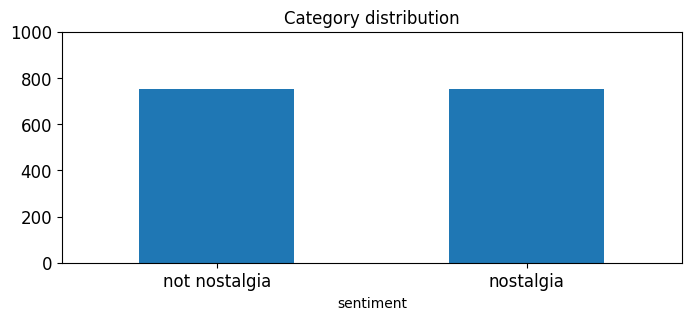

In [50]:
print(X.sentiment.value_counts())
# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',title = 'Category distribution', ylim = [0, 1000], rot = 0, fontsize = 12, figsize = (8,3))

In [51]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


sentiment
not nostalgia    251
nostalgia        249
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

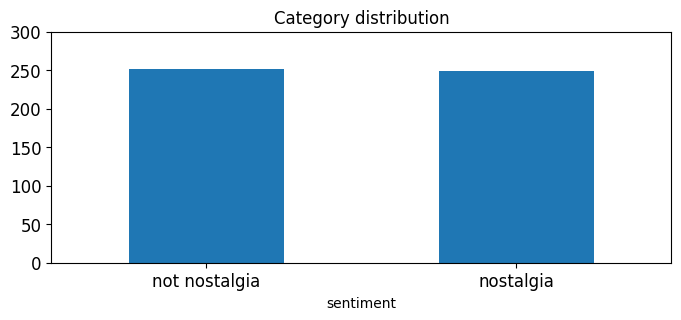

In [52]:
print(X_sample.sentiment.value_counts())
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',title = 'Category distribution', ylim = [0, 300], rot = 0, fontsize = 12, figsize = (8,3))

## **>>> Exercise 7 (Watch Video):**
#### Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sentiment
not nostalgia    251
nostalgia        249
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

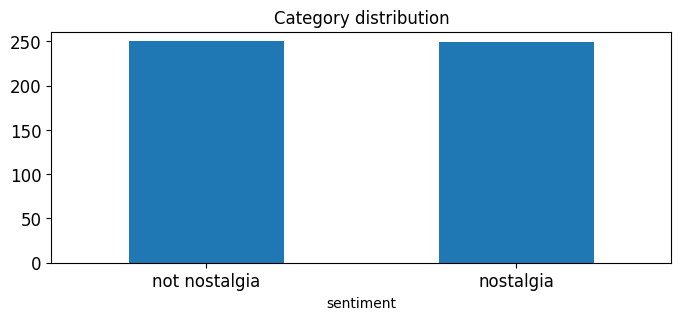

In [53]:
upper_bound = max(X_sample.sentiment.value_counts() + 10)
print(X_sample.sentiment.value_counts())
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',title = 'Category distribution',ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,3))

## **>>> Exercise 8 (take home):**
#### We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

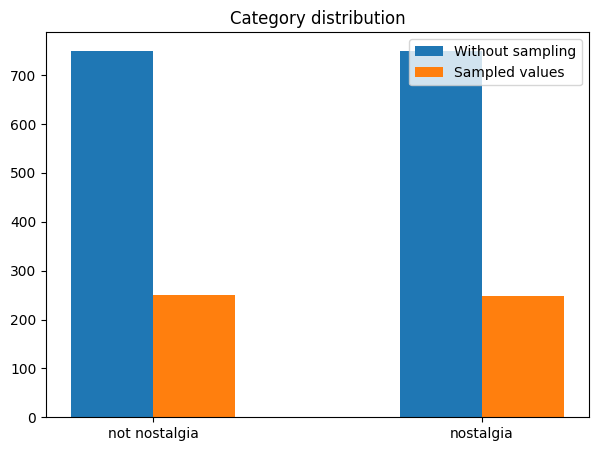

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories
categories = X.sentiment.value_counts()
N = len(categories)

# Position of the categories in x-axis
bar_positions = np.arange(N)

# Graph size and bar width
plt.figure(figsize=(7, 5))
bar_width = 0.25

# Plotting the bars
plt.bar(bar_positions, categories, bar_width, label='Without sampling')
plt.bar(bar_positions + bar_width, X_sample.sentiment.value_counts(), bar_width, label='Sampled values')

# Title and ticks
plt.title('Category distribution')
plt.xticks(bar_positions + bar_width / 2, categories.index)  # Use category names directly
plt.legend()
plt.show()


## 5.2 Feature Creation

In [55]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))


In [57]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [58]:
X[0:4]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [59]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

## 5.3 Feature subset selection

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [61]:
count_vect.get_feature_names_out()[3000]

'skipper'

In [62]:
count_vect.get_feature_names_out()[1500]

'grandfather'

In [63]:
count_vect.get_feature_names_out()[1000]

'dj'

In [64]:
count_vect.get_feature_names_out()[500]

'bond'

In [65]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

## **>>> Exercise 9 (Watch Video):**
#### Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [66]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

Now let us look at the term-document matrix we built above.

In [67]:
# We can check the shape of this matrix by:
X_counts.shape

(1500, 3730)

In [68]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [69]:
X_counts.shape

(1500, 3730)

In [70]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [71]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

## **>>> Exercise 10 (take home):**
#### We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [72]:
import numpy as np

# Convert the sparse matrix to a normal array
X_array = X_counts[0:5, 0:100].toarray()

# Use np.where to get the indices of values equal to 1 in the fifth record
terms = np.where(X_array[4] == 1)[0]

# Print these indices
print(terms)

# Retrieve the corresponding words based on the indices
words = count_vect.get_feature_names_out()[terms]
print(words)



[]
[]


In [73]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [74]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [75]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

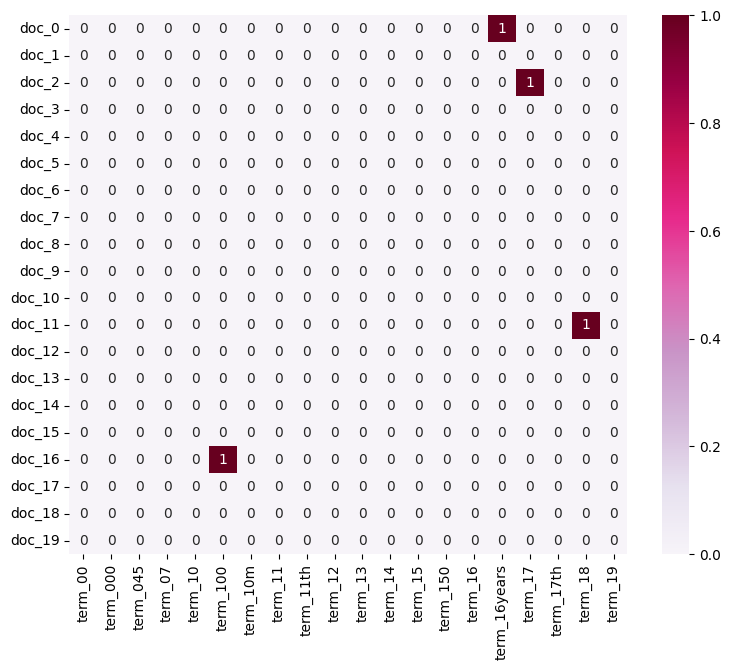

In [76]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd", vmin=0, vmax=1, annot=True)

## **>>> Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with FREQUENCY of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

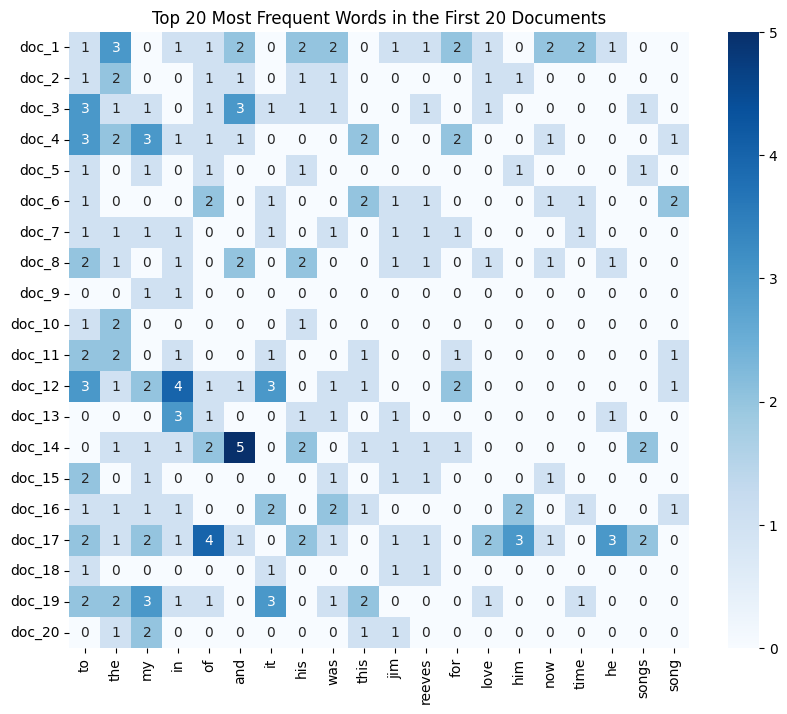

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the term frequency matrix for the first 20 documents
doc_20_array = X_counts[0:20, :].toarray()  # Matrix for the first 20 documents

# Calculate the total frequency of each term in the first 20 documents
total_word_frequencies = np.sum(doc_20_array, axis=0)  # Sum across columns

# Find the indices of the top 20 most frequent terms
top_20_indices = total_word_frequencies.argsort()[-20:][::-1]  # Get the indices of the top 20 terms, sorted in descending order

# Get the corresponding term names for these indices
top_20_words = count_vect.get_feature_names_out()[top_20_indices]

# Retrieve the counts of these terms in the first 20 documents
top_20_word_counts = doc_20_array[:, top_20_indices]  # Only extract the frequencies of these terms

# Convert the results to a DataFrame for plotting
df_top_20 = pd.DataFrame(top_20_word_counts, columns=top_20_words, index=["doc_" + str(i) for i in range(1, 21)])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_top_20, cmap="Blues", annot=True, fmt="d")
plt.title("Top 20 Most Frequent Words in the First 20 Documents")
plt.show()




## 5.4 Attribute Transformation / Aggregation

In [78]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [79]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [80]:
term_frequencies[0] #sum of first term: 00

1

<ipython-input-81-9cb5cf1287d9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


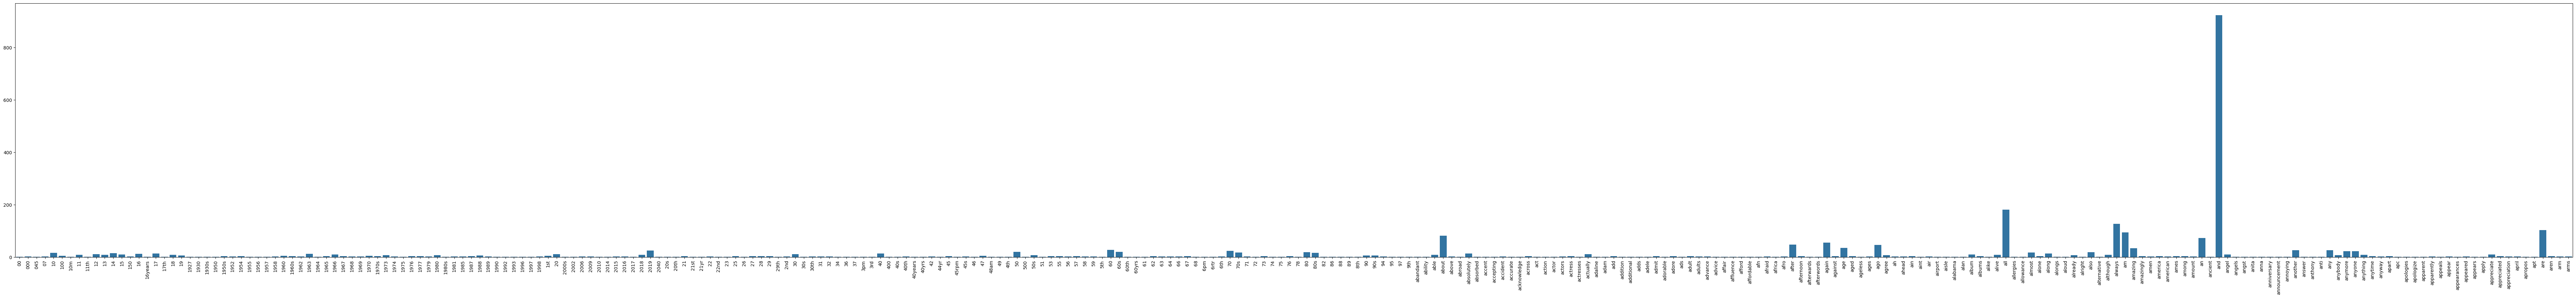

In [81]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## **>>> Exercise 12 (take home):**
#### If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [82]:
import plotly.express as px
import pandas as pd

# Assuming term_frequencies contains the calculated term frequencies
terms = count_vect.get_feature_names_out()[:300]  # Get the first 300 terms
df = pd.DataFrame({'Term': terms, 'Frequency': term_frequencies[:300]})

# Create a bar chart
fig = px.bar(df, x='Term', y='Frequency', title='Top 300 Term Frequencies', labels={'Term': 'Terms', 'Frequency': 'Frequencies'})

# Set the rotation of x-axis labels
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels by 45 degrees

# Display the chart
fig.show()

## **>>> Exercise 13 (take home):**

#### The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

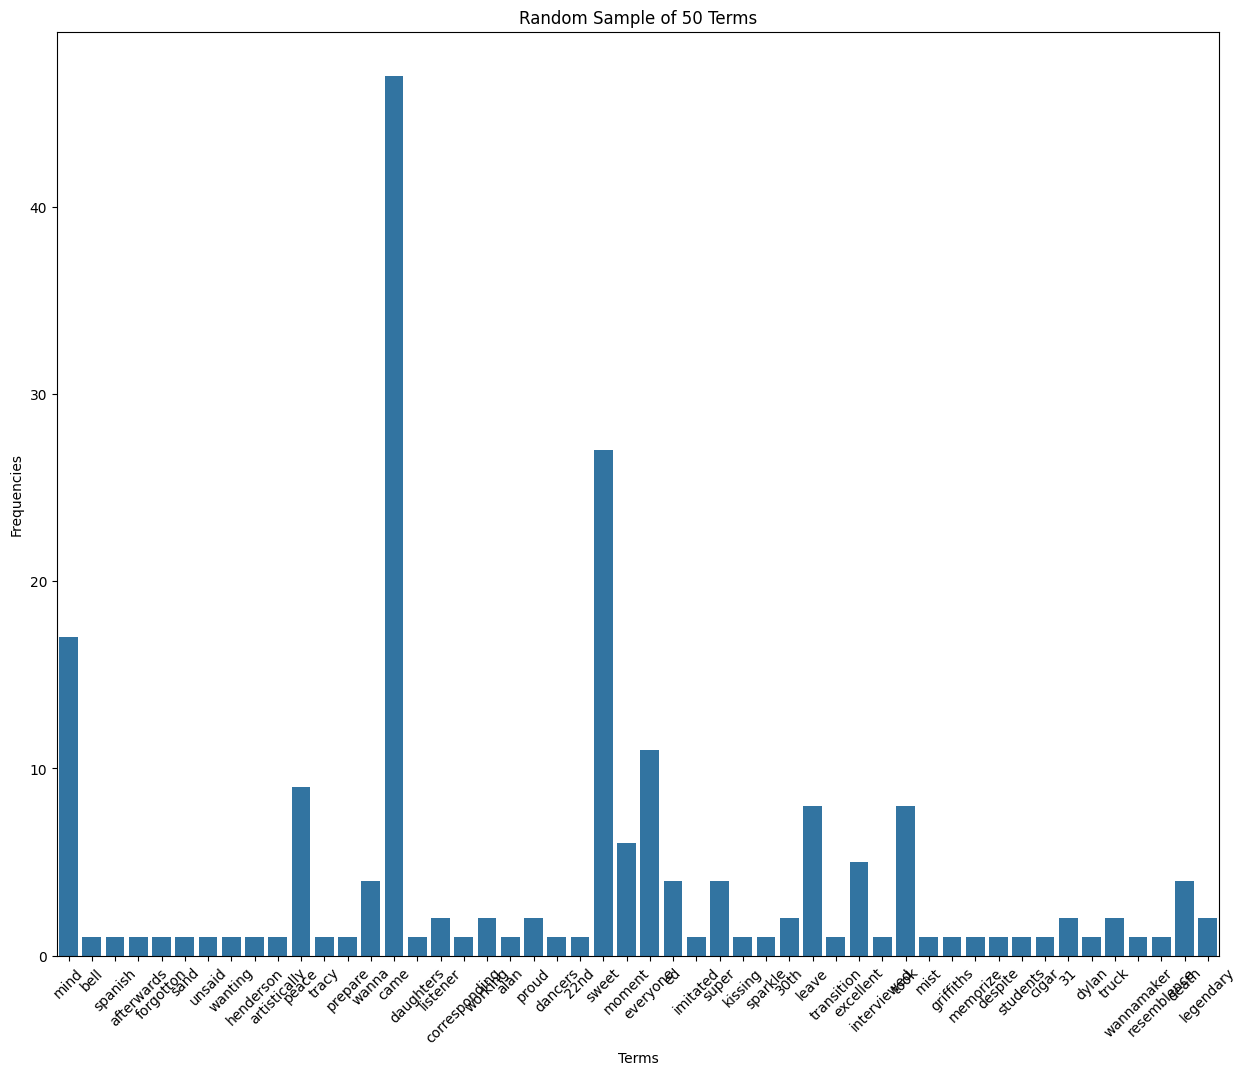

In [83]:
import random

# Randomly select N terms
sample_size = 50  # Number of terms to randomly select
sample_indices = random.sample(range(X_counts.shape[1]), sample_size)

# Plot the bar chart
plt.figure(figsize=(15, 12))
sns.barplot(x=count_vect.get_feature_names_out()[sample_indices], y=term_frequencies[sample_indices])
plt.xticks(rotation=45)
plt.title(f'Random Sample of {sample_size} Terms')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.show()


## **>>> Exercise 14 (take home):**
#### Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [84]:
import numpy as np
import plotly.express as px

# Calculate the frequency of each term
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Get the indices of the high-frequency terms
top_n = 50  # You can adjust the value of N as needed
top_indices = np.argsort(term_frequencies)[-top_n:]  # Get the indices of the N terms with the highest frequencies

# Prepare the data
terms = count_vect.get_feature_names_out()[top_indices]
frequencies = term_frequencies[top_indices]

# Sort by frequency
sorted_indices = np.argsort(frequencies)[::-1]  # Sort in descending order
sorted_terms = terms[sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

# Plot the bar chart
fig = px.bar(x=sorted_terms, y=sorted_frequencies, title=f'Top {top_n} Term Frequencies Sorted by Frequency',
             labels={'x': 'Terms', 'y': 'Frequencies'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()



In [85]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<ipython-input-86-95b72ce9758d>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



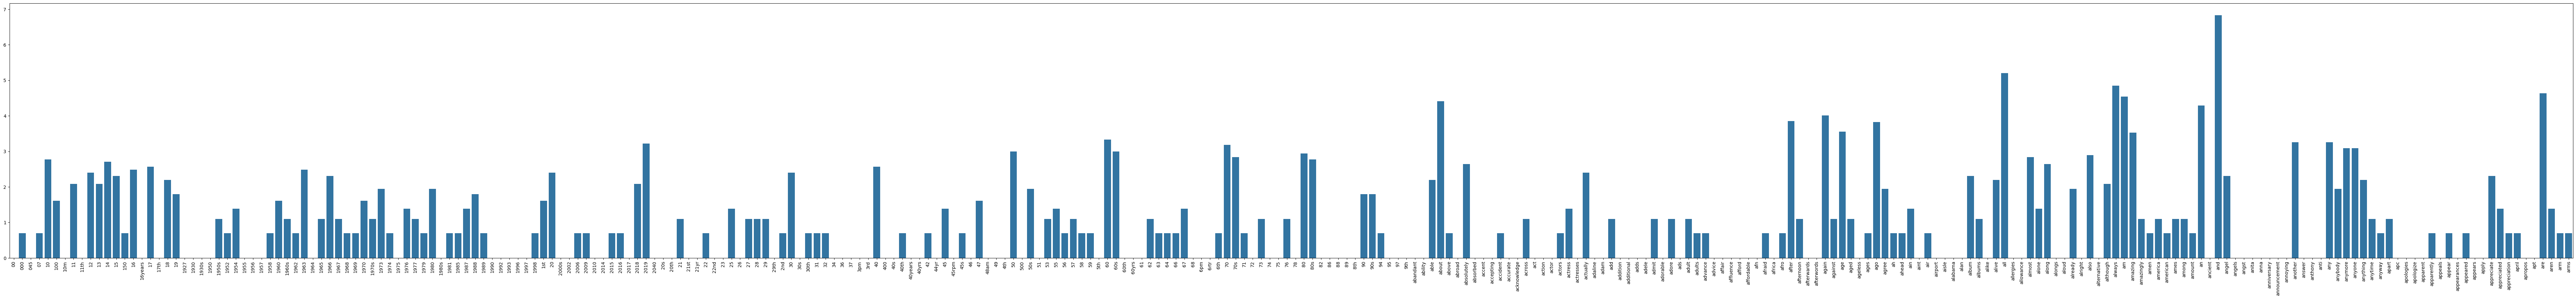

In [86]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## **>>> Exercise 15 (take home):**
#### You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [87]:
import numpy as np
import plotly.express as px
import math

# Calculate the frequency of each term
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Convert term frequencies to logarithmic scale to avoid log(0)
term_frequencies_log = [math.log(f) if f > 0 else 0 for f in term_frequencies]

# Get the indices of the high-frequency terms
top_n = 50  # You can adjust the value of N as needed
top_indices = np.argsort(term_frequencies_log)[-top_n:]  # Get the indices of the N terms with the highest log frequencies

# Prepare the data
terms = count_vect.get_feature_names_out()[top_indices]
frequencies_log = np.array(term_frequencies_log)[top_indices]

# Sort by frequency
sorted_indices = np.argsort(frequencies_log)[::-1]  # Sort in descending order
sorted_terms = terms[sorted_indices]
sorted_frequencies_log = frequencies_log[sorted_indices]

# Plot the bar chart
fig = px.bar(x=sorted_terms, y=sorted_frequencies_log, title=f'Top {top_n} Log-Term Frequencies Sorted by Frequency',
             labels={'x': 'Terms', 'y': 'Log Frequencies'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


When using a logarithmic transformation, the frequency values ​​in the bar chart will appear more even. This is because the logarithm closes the gap between high- and low-frequency words. In the original bar chart, the first few high-frequency words will stand out, while the frequencies of the remaining words will be barely visible; in the logarithmic chart, the differences between these words will appear smoother.

#### **Finding frequent patterns**

In [88]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [89]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

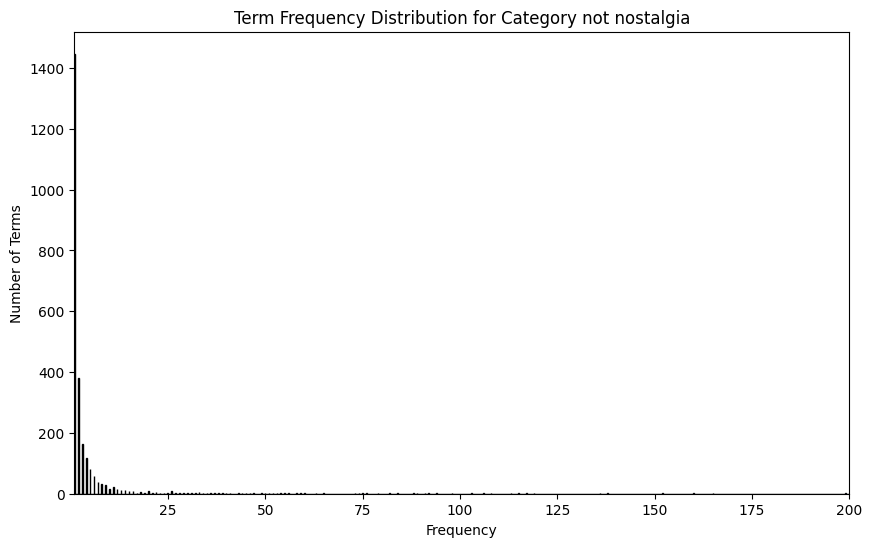

In [90]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [91]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

In [92]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 453, 451, ...,   1,   1,   1])

In [93]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0])

In [94]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

708

In [95]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [96]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 453, 708])

In [97]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [98]:
filt_term_document_dfs[categories[category_number]].loc[:,'100'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

5

In [99]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

## **>>> Exercise 16 (take home):**
#### Review the words that were filtered in each category and comment about the differences and similarities that you can see.


When analyzing the filtered vocabulary of two sentiment categories, clear similarities and differences can be observed. Firstly, the top 5% of vocabulary in both categories includes common conjunctions and pronouns, which are universally present in language and play an important role in both expressing sentiment and guiding sentence structure. However, these words serve different functions in emotional expression.

For the non-nostalgic category, top words such as "classic," "got," and "first" exhibit a more direct emotional tone, possibly reflecting evaluations or perceptions of certain things. These types of vocabulary are often associated with more positive emotions, indicating a favorable response to the present or past.

In contrast, the top words in the nostalgic category, such as "takes," "little," and "wonderful," carry deeper emotional connotations. These words not only express a longing for the past but also emphasize the beauty and preciousness of those times. This highlights the uniqueness of nostalgic emotions, often accompanied by reflections on the passage of time and emotional resonance.

In the analysis of the bottom 1% of vocabulary, the non-nostalgic category shows some unique, highly contextual words, such as "mocking" and "montgomery," which may lack sufficient emotional depth and therefore appear relatively cold in expression. In comparison, the bottom words in the nostalgic category, such as "sadder" and "ruined," carry more emotional weight, possibly expressing a sense of loss and yearning for better times, reflecting the complexity of nostalgic feelings.

Overall, these similarities and differences in vocabulary not only reveal linguistic features in different emotional categories but also reflect the deep connections between language and emotion. Such analysis enhances understanding of the text and provides valuable insights for emotional research.

<hr>

In [101]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


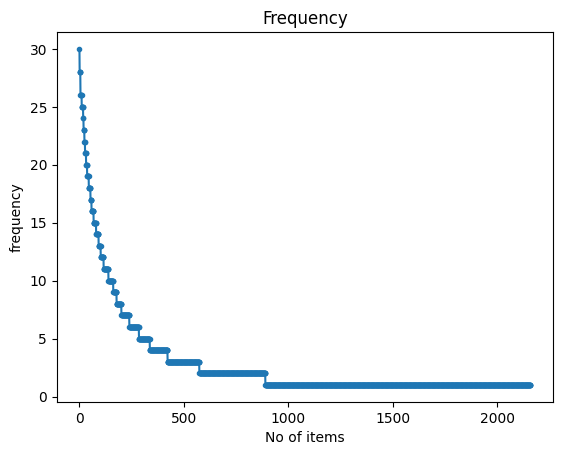

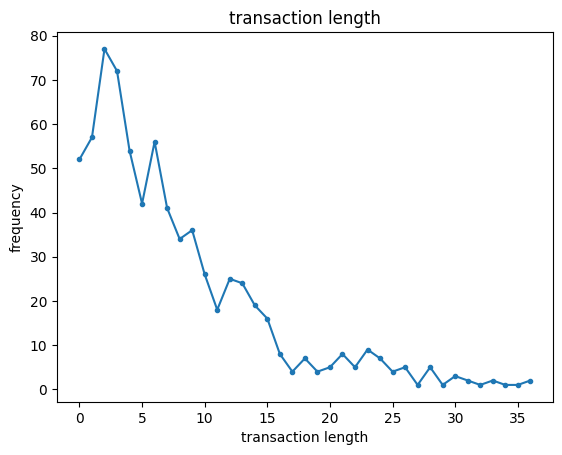

In [102]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.4541698904223
Sparsity : 0.9965649449010148


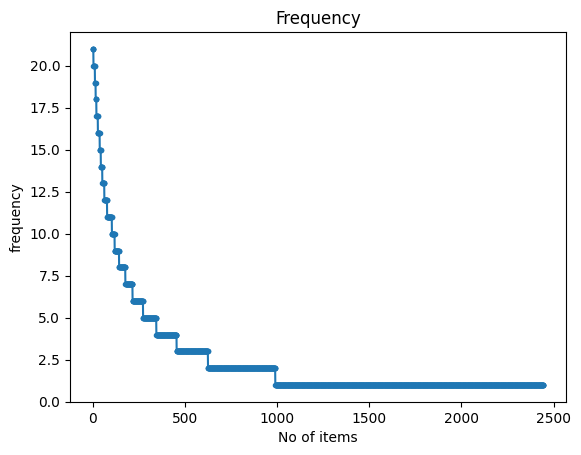

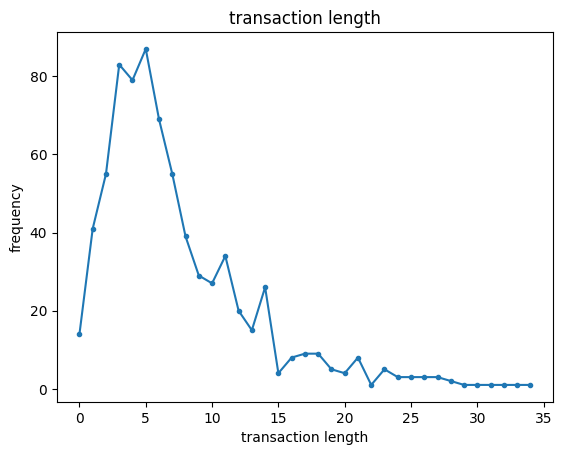

In [104]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [105]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.4417877197265625


In [106]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [107]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.010968208312988281


In [108]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [109]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [110]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)



In [111]:
tdm_df

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  
1499      0         0        0    0    0    0        0      0  

[1500 rows x 3730 columns]

In [112]:
augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1500 rows x 3950 columns]

## **>>> Exercise 17 (take home):**
#### Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'nostalgia' category in our processed database. Only implement the mining part of the algorithm and display the resulting patterns, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 200, 500, and 800, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

FAE Top-K

In [113]:
import time
import pandas as pd
from FAE import FAE  # Import FAE class directly from the FAE.py file downloaded from GitHub

# Set the k values to test; k=1000 and 1500 take too long to compute, so set k to 200, 500, and 800
k_values = [200, 500, 800]

# Run FAE Top-K algorithm for each k value
for k in k_values:
    print(f"Running FAE Top-K with k = {k}")

    # Start timing
    start_time = time.time()

    # Initialize FAE object; assuming the FAE class has iFile and k parameters
    obj2 = FAE(iFile='td_freq_db_nostalgia.csv', k=k)

    # Perform mining
    obj2.mine()

    # Extract patterns as a DataFrame
    patterns_df = obj2.getPatternsAsDataFrame()

    # Calculate execution time
    runtime = time.time() - start_time

    # Display the total number of patterns and execution time
    print(f"Total No of patterns for k = {k}: {len(patterns_df)}")
    print(f"Runtime for k = {k}: {runtime:.2f} seconds")

    # Display the first 10 patterns
    print(f"Patterns (first 10) for k = {k}:")
    print(patterns_df.head(10))





Running FAE Top-K with k = 200
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k = 200: 200
Runtime for k = 200: 0.03 seconds
Patterns (first 10) for k = 200:
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28
5       kid       26
6      only       26
7      such       26
8      them       26
9        or       26
Running FAE Top-K with k = 500
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k = 500: 500
Runtime for k = 500: 0.13 seconds
Patterns (first 10) for k = 500:
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28
5       kid       26
6      only       26
7      such       26
8      them       26
9        or       26
Running FAE Top-K with k = 800
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patt

MaxFPGrowth

In [114]:
import time
import pandas as pd
from MaxFPGrowth import MaxFPGrowth  # Import MaxFPGrowth class directly from the MaxFPGrowth.py file downloaded from GitHub

# Set the minimum support thresholds to test
min_sups = [3, 6, 9]

# Run MaxFPGrowth algorithm for each minimum support value
for min_sup in min_sups:
    print(f"Running MaxFPGrowth with minSup = {min_sup}")
    obj3 = MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=min_sup)
    obj3.mine()

    # Extract patterns as a DataFrame
    patterns_df = obj3.getPatternsAsDataFrame()

    # Display the total number of patterns and execution time
    print(f"Total No of patterns for minSup = {min_sup}: {len(patterns_df)}")
    print(f"Runtime for minSup = {min_sup}: {obj3.getRuntime()}")

    # Display the first 10 patterns
    print(f"Patterns (first 10) for minSup = {min_sup}:")
    print(patterns_df.head(10))



Running MaxFPGrowth with minSup = 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup = 3: 682
Runtime for minSup = 3: 0.07403397560119629
Patterns (first 10) for minSup = 3:
   Patterns  Support
0  skating         3
1   walker         3
2    scott         3
3  17 1987         3
4     stop         3
5     date         3
6    fresh         3
7     loud         3
8  leaving         3
9  finally         3
Running MaxFPGrowth with minSup = 6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup = 6: 274
Runtime for minSup = 6: 0.040130615234375
Patterns (first 10) for minSup = 6:
    Patterns  Support
0      1973         6
1   looking         6
2  actually         6
3      fast         6
4  innocent         6
5  romantic         6
6   nothing         6
7    heaven         6
8      full         6
9      room         6
Running MaxFPGrowth with minSup = 9
Maximal Fre


**FPGrowth Algorithm**

Total number of patterns: 180

Runtime: 0.44 seconds.

The runtime for k = 200 is approximately 0.03 seconds.

The runtime for k = 500 is approximately 0.13 seconds.

The runtime for k = 800 is approximately 0.57 seconds.

**The runtime of the FAE Top-K algorithm increases with the increase in k values.**

The runtime with a minimum support threshold of 3 is approximately 0.074 seconds.

The runtime with a minimum support threshold of 6 is approximately 0.04 seconds.

The runtime with a minimum support threshold of 9 is approximately 0.026 seconds.

**The runtime of MaxFPGrowth varies under different support thresholds.**

The runtime is 0.074 seconds with a minimum support of 3, while it is 0.04 seconds and 0.026 seconds for supports of 6 and 9, respectively, indicating that the algorithm's efficiency improves at higher support thresholds.

## 5.5 Dimensionality Reduction

In [116]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [117]:
X_pca_tdm.shape

(1500, 2)

In [118]:
X_tsne_tdm.shape

(1500, 2)

In [119]:
X_umap_tdm.shape

(1500, 2)

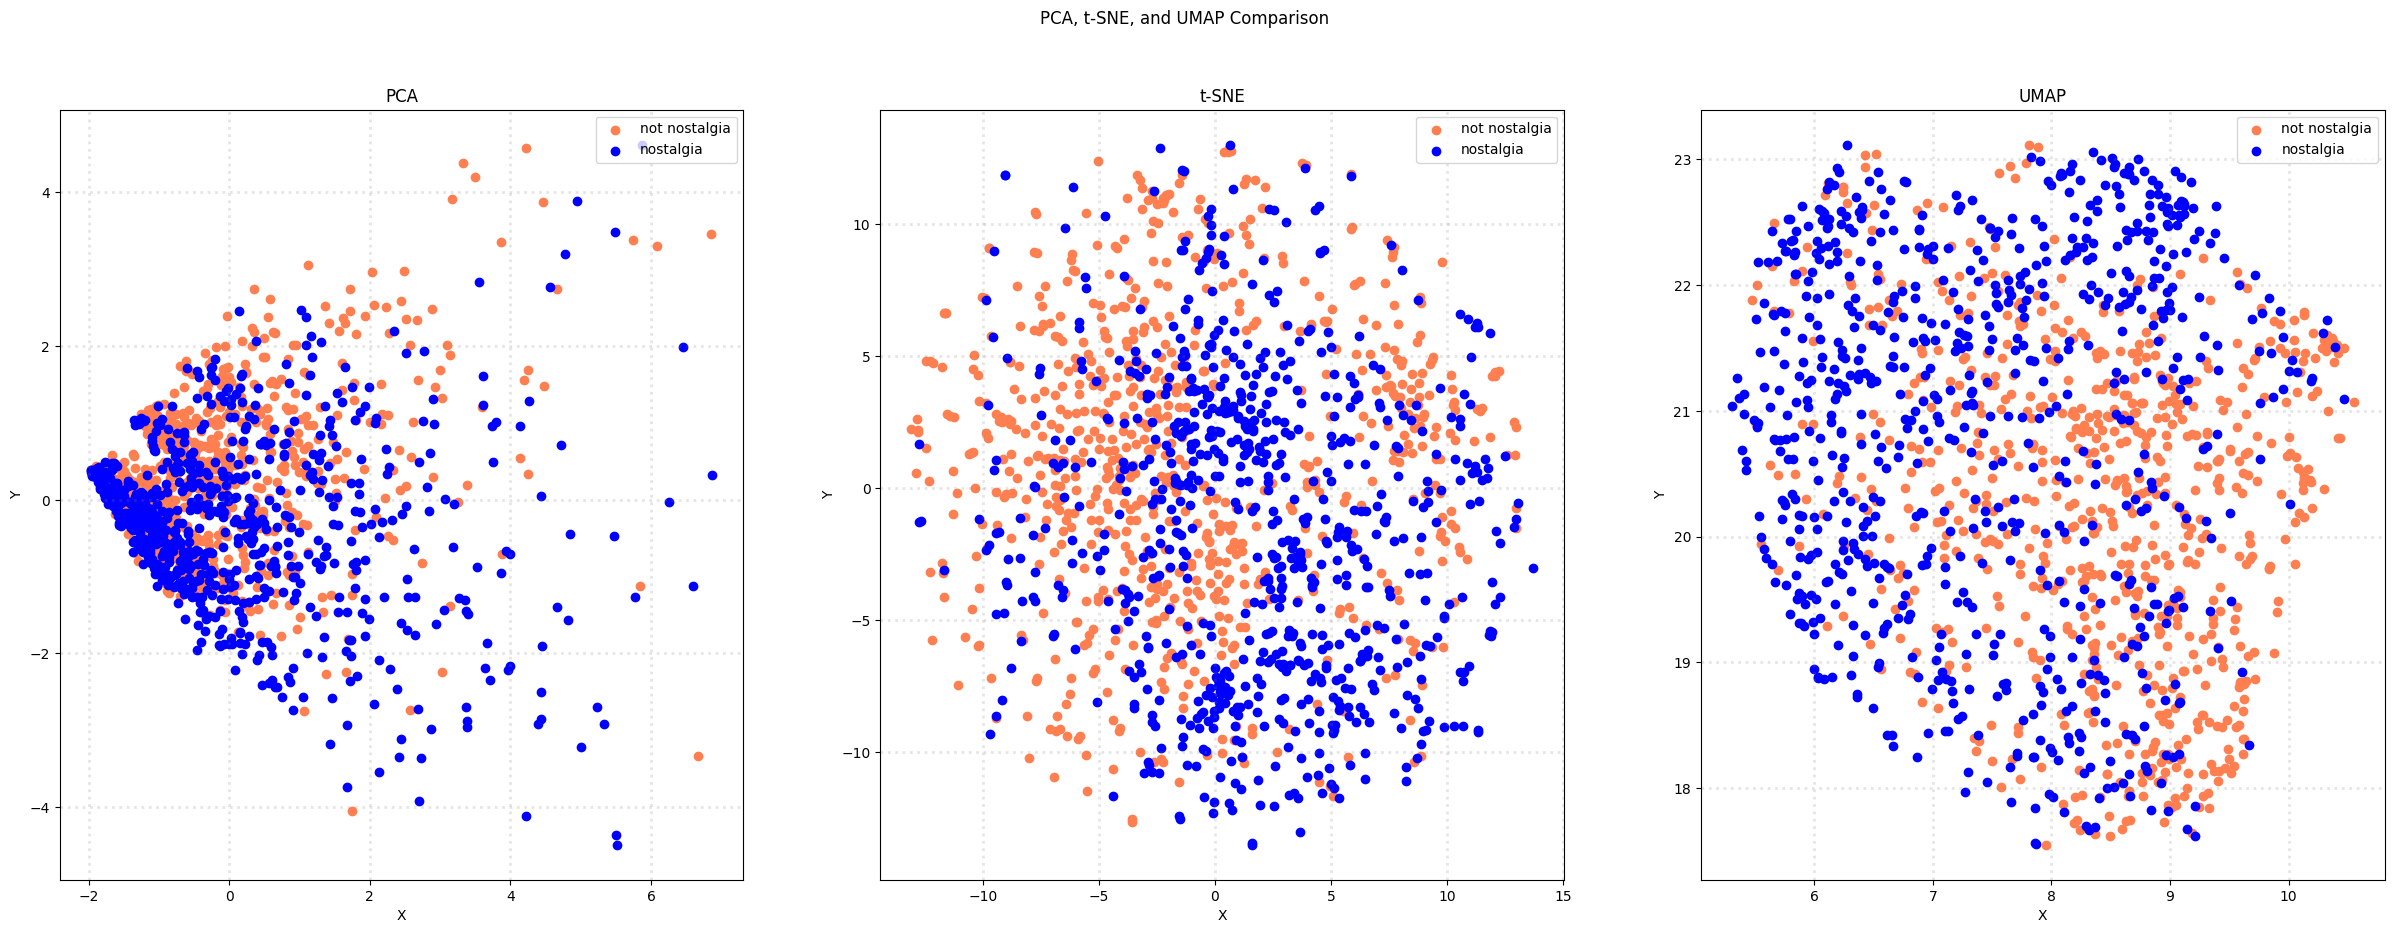

In [120]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [121]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

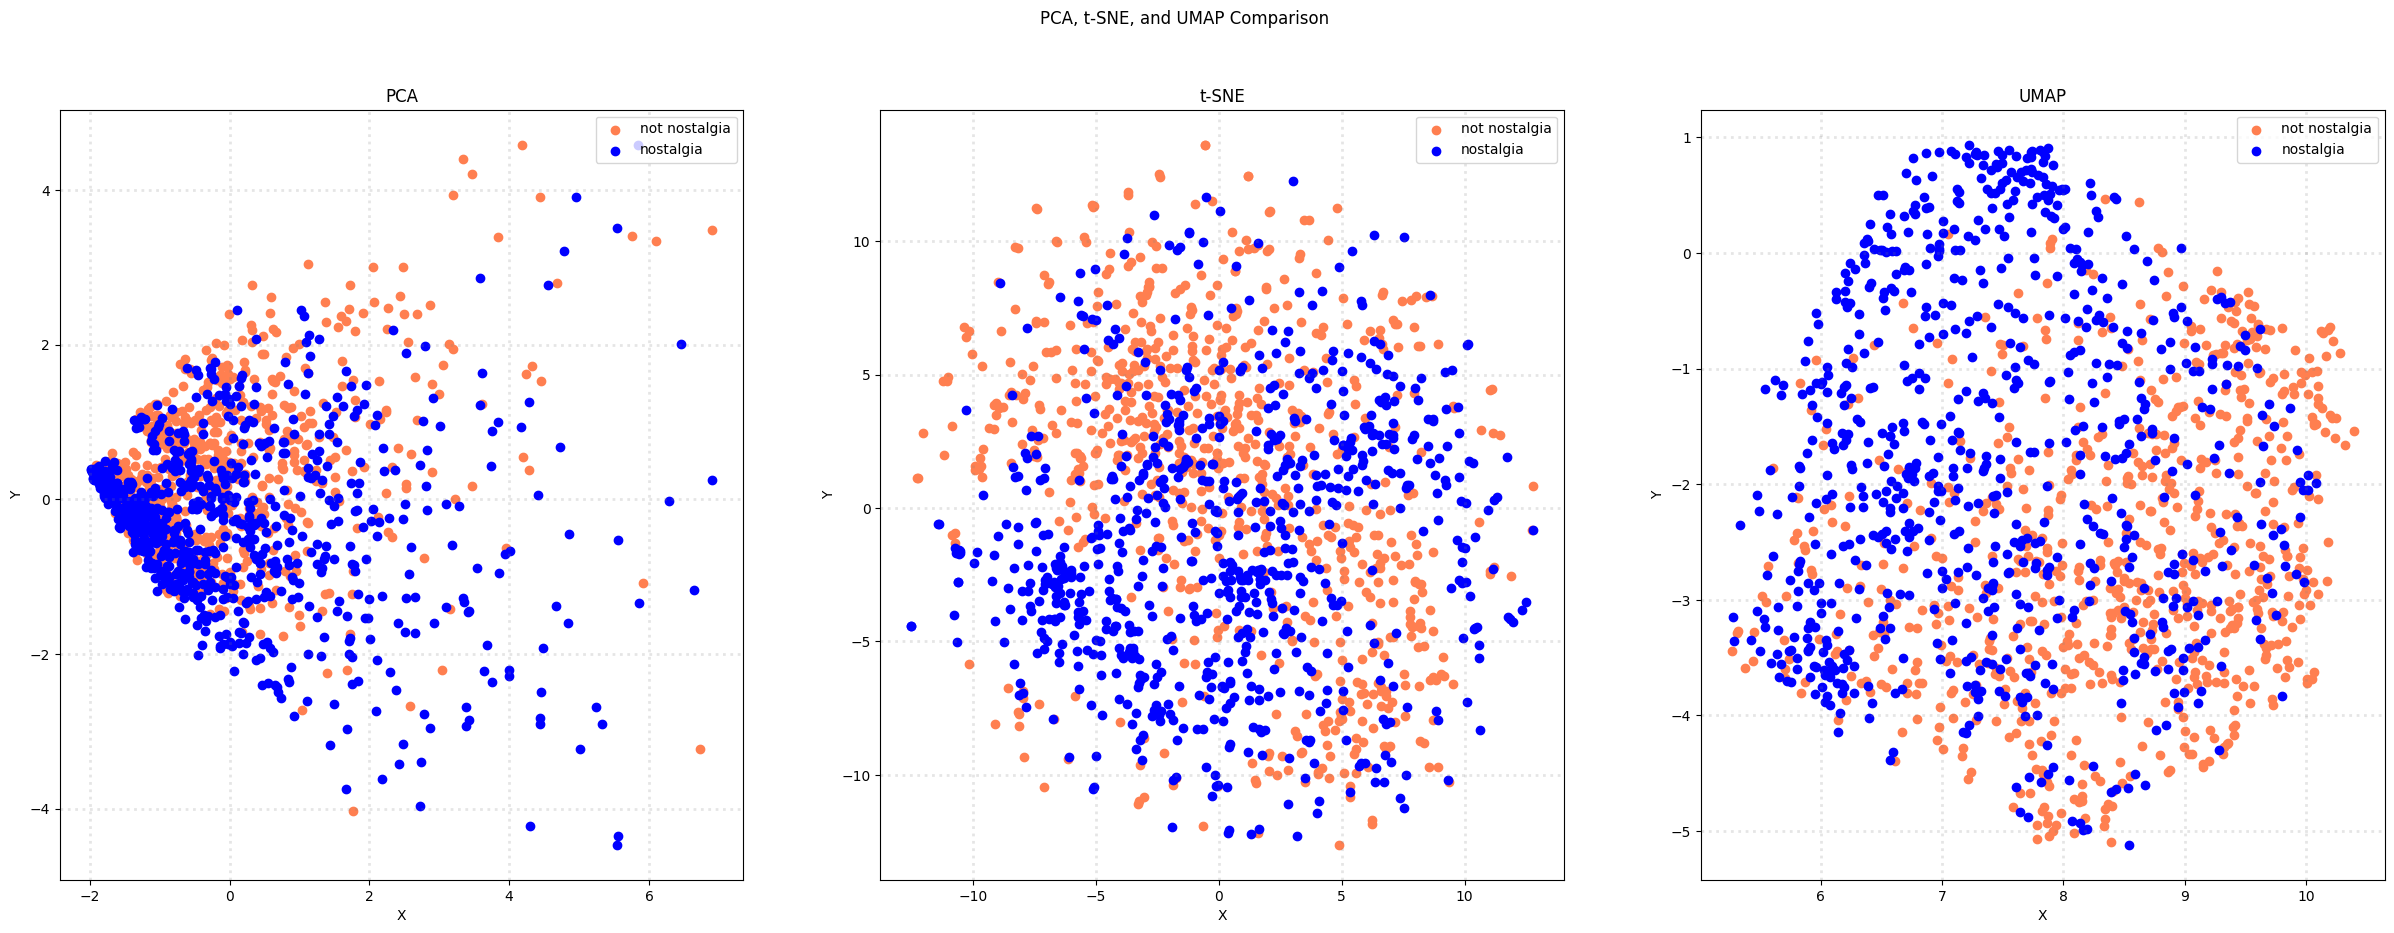

In [122]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

## >>> Exercise 18 (take home):
#### Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

#### Hint: you can refer to Axes3D in the documentation.

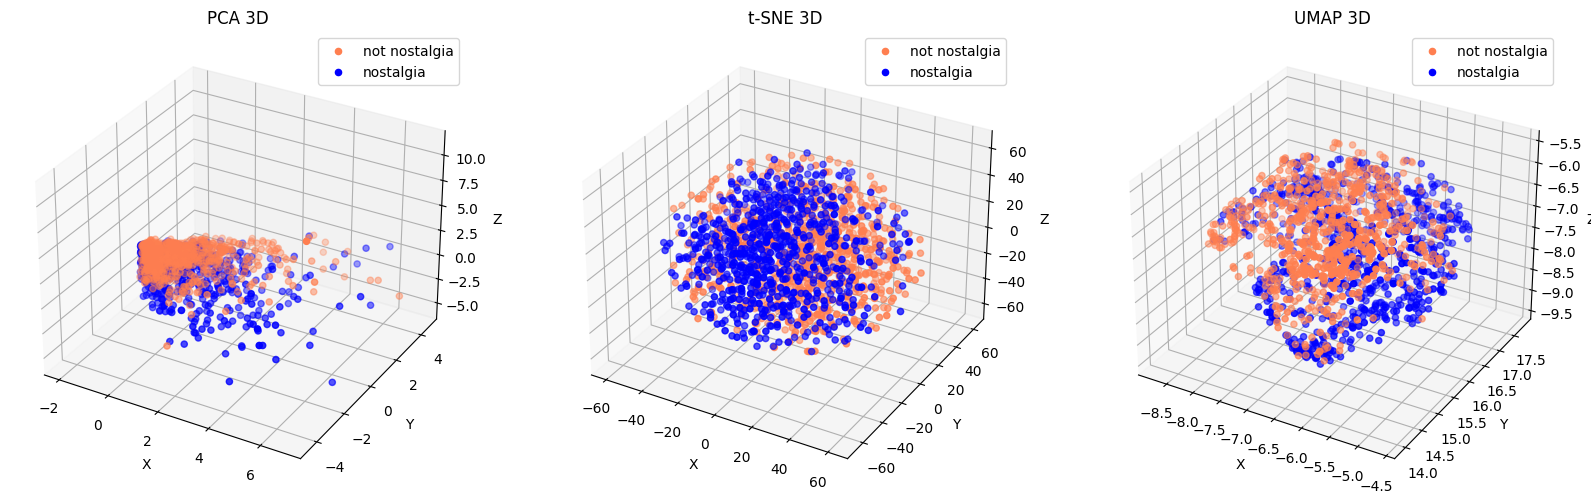

In [123]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data with 3 components
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define a function to create 3D scatter plots
def plot_3d_scatter(X_reduced, title, ax):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category][:, 0]
        ys = X_reduced[X['sentiment'] == category][:, 1]
        zs = X_reduced[X['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create a figure for the 3D plots
fig = plt.figure(figsize=(20, 15))

# 1st subplot - PCA
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(X_pca_3d, 'PCA 3D', ax1)

# 2nd subplot - t-SNE
ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(X_tsne_3d, 't-SNE 3D', ax2)

# 3rd subplot - UMAP
ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(X_umap_3d, 'UMAP 3D', ax3)

plt.show()


## 5.6 Discretization and Binarization

In [124]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [125]:
mlb = preprocessing.LabelBinarizer()

In [126]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [127]:
X['bin_category'] = mlb.transform(X['sentiment']).tolist()

In [128]:
X[0:9]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {to, and, for, with, that, we, loving., his, t...          [1]  
1  {kid, to, and, an, his, angel, love, him, was,...          [0]  
2  {Always, to, and, but, 17., up, with, how, had...          [0]  
3  {to, for, and, greatest, that, years, is, the,...          [1]  
4  {to, my, songs, me, of, who, everyday, his, pl...          [0]  
5  {to, child,, appreciate, that, death,, your, r...          [0]  
6  {to, didn't, for, but, things., teenager, how,...          [0]  
7  {to, and, am, comes, with, nostalgic, TO, his,...          [0]  
8        {my, you, in, always, Wherever, heart, are}          [1]

## >>> Exercise 19 (take home):
#### Try to generate the binarization using the category_name column instead. Does it work?

In [129]:
from sklearn import preprocessing

# Use LabelBinarizer to binarize the category_name
mlb = preprocessing.MultiLabelBinarizer()

# Convert the sentiment column into binary format
X['bin_category'] = mlb.fit_transform(X['sentiment'].apply(lambda x: [x])).tolist()

# Check the results
print(X[['sentiment', 'bin_category']].head(9))



       sentiment bin_category
0  not nostalgia       [0, 1]
1      nostalgia       [1, 0]
2      nostalgia       [1, 0]
3  not nostalgia       [0, 1]
4      nostalgia       [1, 0]
5      nostalgia       [1, 0]
6      nostalgia       [1, 0]
7      nostalgia       [1, 0]
8  not nostalgia       [0, 1]


## **6. Data Exploration**

In [130]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [131]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [132]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [133]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


<ipython-input-133-4a26afacce62>:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-133-4a26afacce62>:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-133-4a26afacce62>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-133-4a26afacce62>:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing th

## **7. Data Classification**

In [134]:
# Obtain the documents containing the categories provided
df = pd.read_csv('/content/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Use the map method to convert 'nostalgia' to 1 and 'not nostalgia' to 0
df['category'] = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})

# Display the results
print(df['category'])


0       0
1       1
2       1
3       0
4       1
       ..
1495    0
1496    0
1497    0
1498    1
1499    1
Name: category, Length: 1500, dtype: int64


In [135]:
X = df
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  
0            0  
1            1  
2            1  
3            0  
4            1  
...        ...  
1495         0  
1496         0  
1497         0  
1498         1  
1499         1  

[1500 rows x 3 columns]

In [136]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [137]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
485    0    0    0   0   0    0    0   0     0   0  ...      0         0   
527    0    0    0   0   0    0    0   0     0   0  ...      0         0   
199    0    0    0   0   0    0    0   0     0   0  ...      0         0   
889    0    0    0   0   0    0    0   0     0   0  ...      0         0   
844    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1130   0    0    0   0   1    0    0   0     0   0  ...      0         0   
1294   0    0    0   0   0    0    0   0     0   0  ...      0         0   
860    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1126   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
485       0         0        0    0    0    0        0      0  
527       0         0        0    0    0    0        0      0  
199       0         0        0    0    0    0        0      0  
889       0         0        0    0    0    0        0      0  
844       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1130      0         0        0    0    0    0        0      0  
1294      0         0        0    0    0    0        0      0  
860       0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  
1126      0         0        0    0    0    0        0      0  

[1050 rows x 3730 columns]

In [138]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1116   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1368   0    0    0   0   0    0    0   0     0   0  ...      0         0   
422    0    0    0   0   0    0    0   0     0   0  ...      0         0   
413    0    0    0   0   0    0    0   0     0   0  ...      0         0   
451    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1083   0    0    0   0   0    0    0   0     0   0  ...      0         0   
990    0    0    0   0   0    0    0   0     0   0  ...      0         0   
650    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1116      0         0        0    0    0    0        0      0  
1368      0         0        0    0    0    0        0      0  
422       0         0        0    0    0    0        0      0  
413       0         0        0    0    0    0        0      0  
451       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1083      0         0        0    0    0    0        0      0  
990       0         0        0    0    0    0        0      0  
650       0         0        0    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [139]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [140]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [141]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
485    0    0    0   0   0    0    0   0     0   0  ...       0       0   
527    0    0    0   0   0    0    0   0     0   0  ...       0       0   
199    0    0    0   0   0    0    0   0     0   0  ...       0       0   
889    0    0    0   0   0    0    0   0     0   0  ...       0       0   
844    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1130   0    0    0   0   1    0    0   0     0   0  ...       0       0   
1294   0    0    0   0   0    0    0   0     0   0  ...       0       0   
860    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1459   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1126   0    0    0   0   0    0    0   0     0   0  ...       1       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
485        0       0     0         0        0   0      0    0  
527        0       0     0         0        0   0      0    0  
199        0       0     0         0        0   0      0    0  
889        0       0     0         0        0   0      0    0  
844        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1130       0       0     0         0        0   0      0    0  
1294       0       0     0         0        0   0      0    0  
860        0       0     0         0        0   0      0    0  
1459       0       0     0         0        0   0      0    0  
1126       0       0     0         0        0   0      0    0  

[1050 rows x 3950 columns]

In [142]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
1116   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1368   0    0    0   0   0    0    0   0     0   0  ...       0       0   
422    0    0    0   0   0    0    0   0     0   0  ...       0       0   
413    0    0    0   0   0    0    0   0     0   0  ...       0       0   
451    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1083   0    0    0   0   0    0    0   0     0   0  ...       0       0   
990    0    0    0   0   0    0    0   0     0   0  ...       0       0   
650    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1188   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
1116       0       0     0         0        0   0      0    0  
1368       0       0     0         0        0   0      0    0  
422        0       0     0         0        0   0      0    0  
413        0       0     0         0        0   0      0    0  
451        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1083       0       0     0         0        0   0      0    0  
990        0       0     0         0        0   0      0    0  
650        0       0     0         0        0   0      0    0  
1188       0       1     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  

[450 rows x 3950 columns]

In [143]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9105    0.7689    0.8337       225
    nostalgia     0.8000    0.9244    0.8577       225

     accuracy                         0.8467       450
    macro avg     0.8553    0.8467    0.8457       450
 weighted avg     0.8553    0.8467    0.8457       450



<hr>

# S3

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Z=vectorizer.fit_transform(X.comment)
vectorizer.get_feature_names_out()
Z.shape

(1500, 3730)

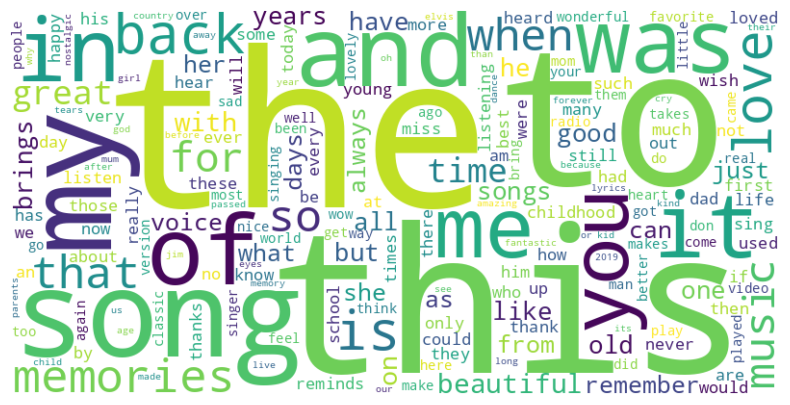

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sum of TF-IDF scores for each word
word_scores = Z.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Create a dictionary of words and their TF-IDF sums
word_freq_dict = dict(zip(words, word_scores))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


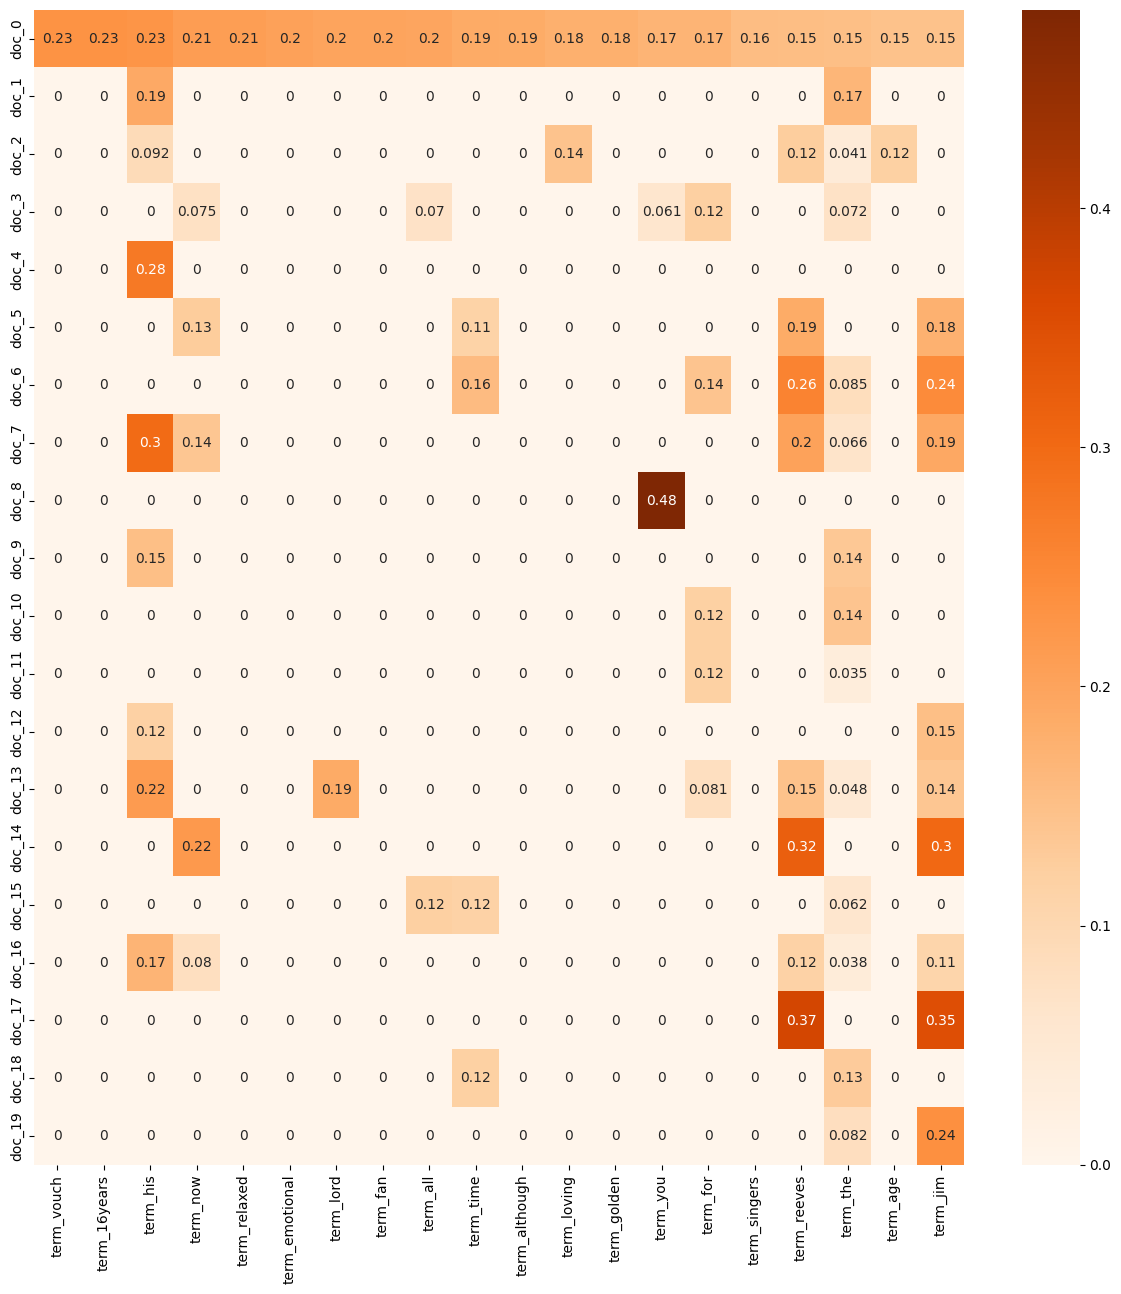

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort terms by their occurrences in document 0 and get the top 20 terms
top_n = 20
index_terms = np.argsort(Z.toarray()[0, :])[::-1][:top_n]  # Get indices of the top N terms
terms = count_vect.get_feature_names_out()[index_terms]  # Retrieve term names

# Prepare data for heatmap
plot_x = [f"term_{term}" for term in terms]  # Term labels
plot_y = [f"doc_{i}" for i in range(top_n)]  # Document labels
plot_z = Z[:top_n, index_terms].toarray()  # Data for the heatmap

# Create DataFrame for plotting
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot the heatmap
plt.subplots(figsize=(15, 15))
sns.heatmap(df_todraw, cmap="Oranges", annot=True, vmin=0, vmax=plot_z.max())
plt.show()


In [147]:
import math
import numpy as np
import plotly.express as px

# Calculate term frequencies
term_frequencies = Z.sum(axis=0).A1  # Flatten the matrix to a 1D array

# Filter terms based on frequency threshold
n = 1
index_terms = np.where(term_frequencies > n)[0]
terms = count_vect.get_feature_names_out()[index_terms]
filtered_frequencies = term_frequencies[index_terms]

# Sort terms and extract the top 50
sorted_indices = np.argsort(filtered_frequencies)[::-1][:50]  # Take the top 50
terms_sorted = terms[sorted_indices]
filtered_frequencies_sorted = filtered_frequencies[sorted_indices]

# Apply logarithmic transformation to frequencies
term_frequencies_log = np.log(filtered_frequencies_sorted)

# Plot
fig = px.bar(x=terms_sorted, y=term_frequencies_log, labels={'x': 'Terms', 'y': 'Log Frequency'},
             title='Top 50 Terms by Log Frequency')
fig.show()


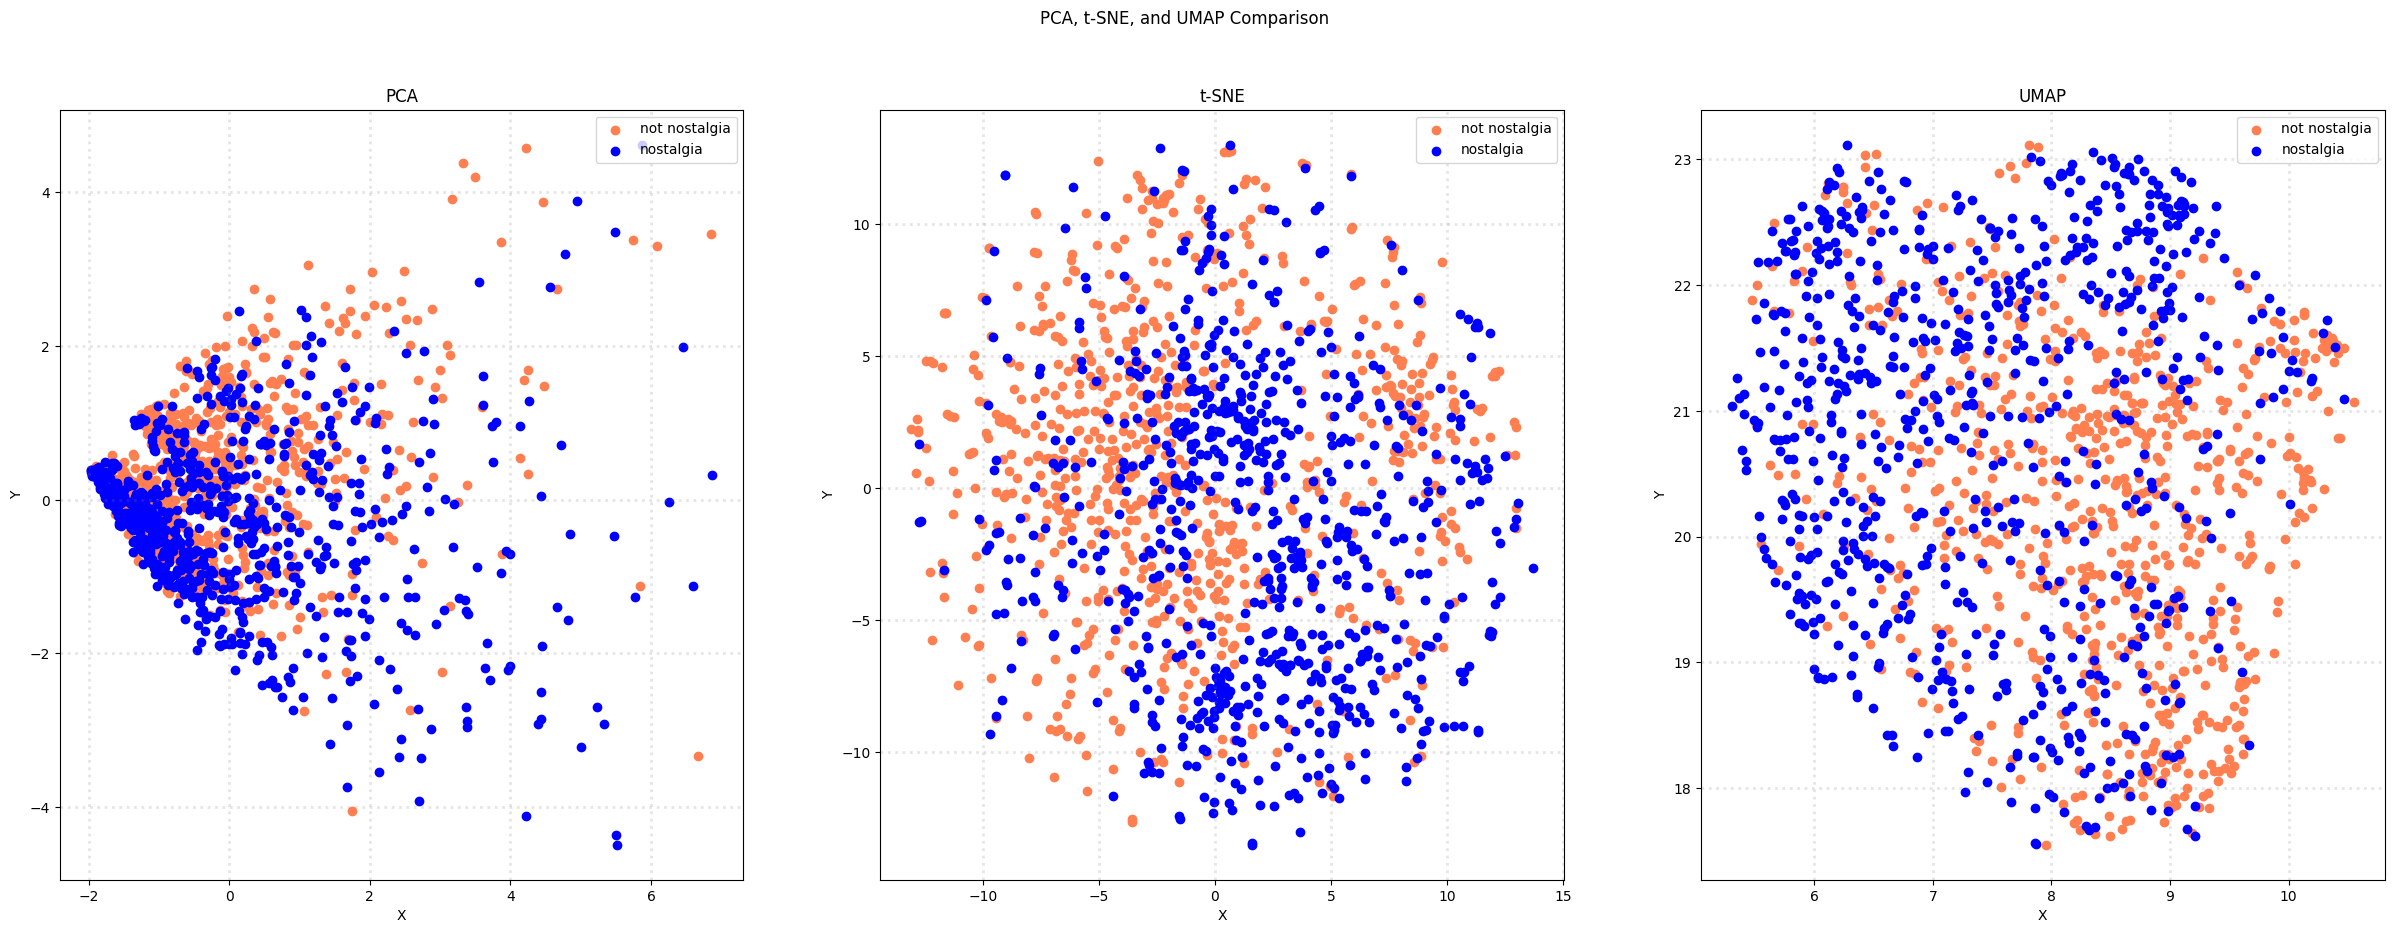

In [148]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions of the TF-IDF tokenized array to 2
Z_reduced = PCA(n_components=2).fit_transform(Z.toarray())
categories = X['sentiment'].unique()



fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, Z_reduced, title):
    for c, category in zip(col, categories):
        xs = Z_reduced[X['sentiment'] == category].T[0]
        ys = Z_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()


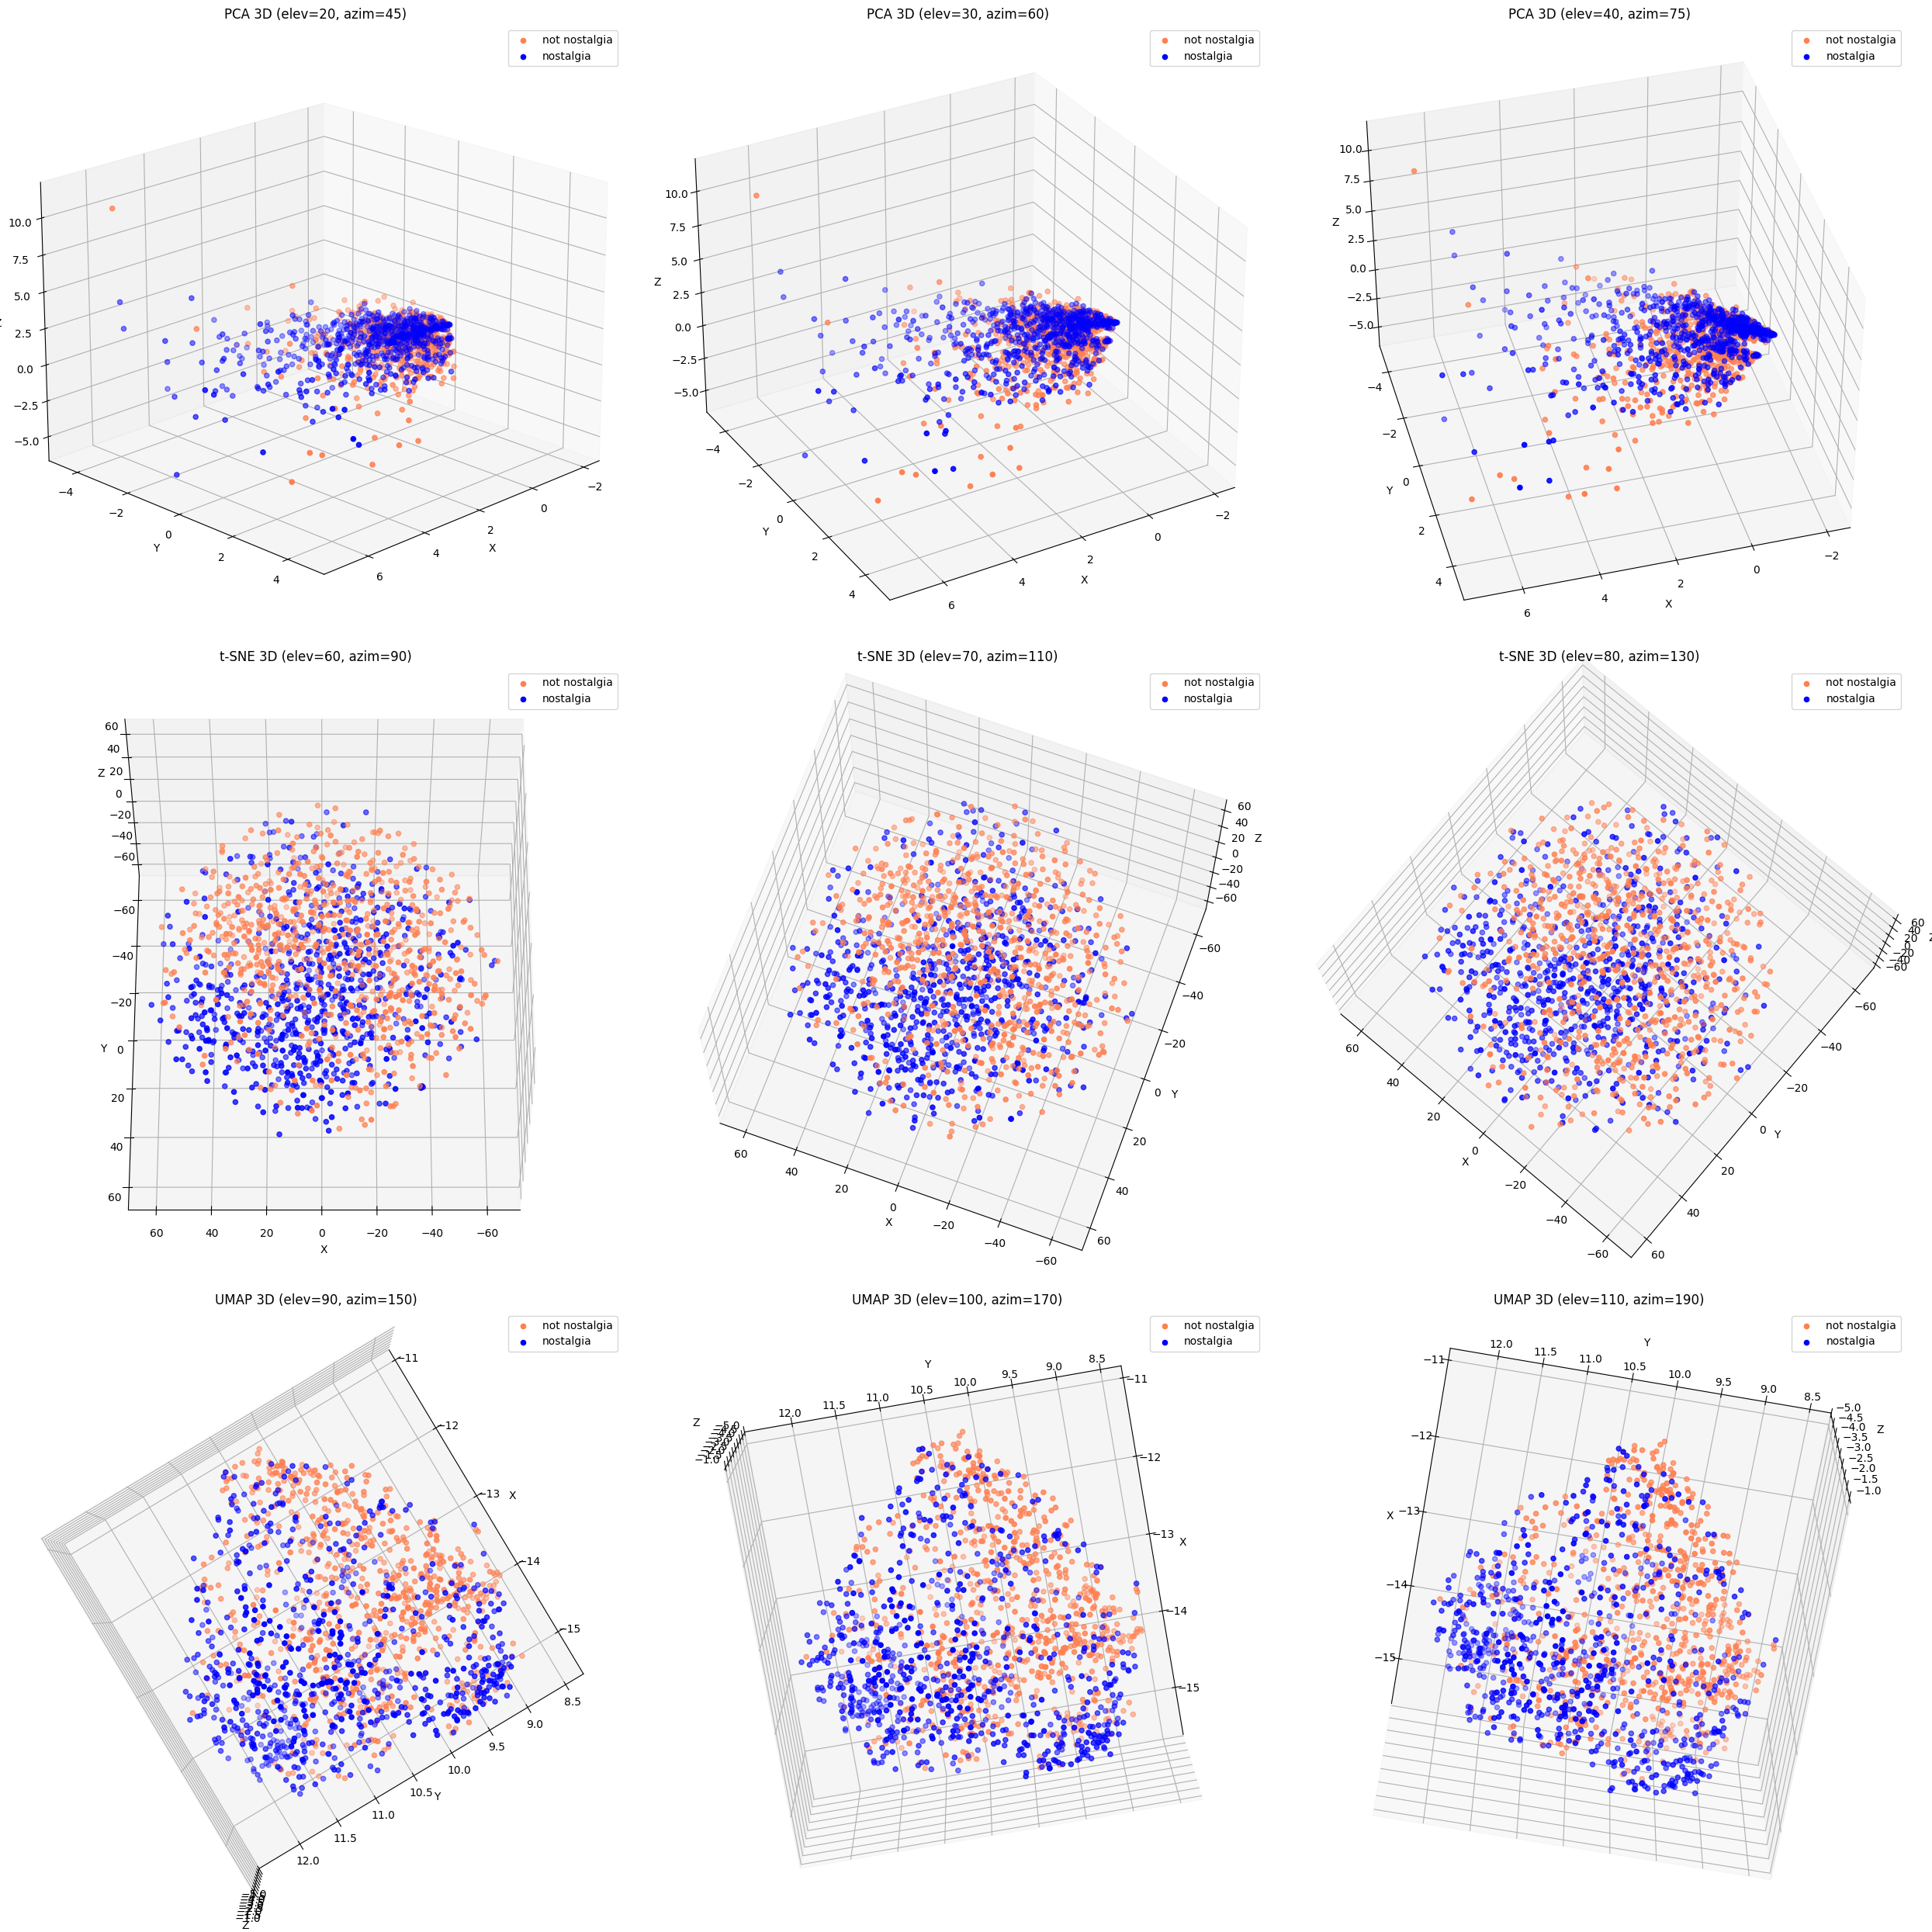

In [149]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data with 3 components
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define a function to create 3D scatter plots
def plot_3d_scatter(X_reduced, title, ax, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category][:, 0]
        ys = X_reduced[X['sentiment'] == category][:, 1]
        zs = X_reduced[X['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Create a figure for the 9 3D plots (3x3 grid)
fig = plt.figure(figsize=(25, 25))

# Define different view angles for each plot
angles = [(20, 45), (30, 60), (40, 75), (60, 90), (70, 110), (80, 130), (90, 150), (100, 170), (110, 190)]

# Plot PCA in the first row with different angles
for i, (elev, azim) in enumerate(angles[:3]):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    plot_3d_scatter(X_pca_3d, f'PCA 3D (elev={elev}, azim={azim})', ax, elev, azim)

# Plot t-SNE in the second row with different angles
for i, (elev, azim) in enumerate(angles[3:6]):
    ax = fig.add_subplot(3, 3, i+4, projection='3d')
    plot_3d_scatter(X_tsne_3d, f't-SNE 3D (elev={elev}, azim={azim})', ax, elev, azim)

# Plot UMAP in the third row with different angles
for i, (elev, azim) in enumerate(angles[6:]):
    ax = fig.add_subplot(3, 3, i+7, projection='3d')
    plot_3d_scatter(X_umap_3d, f'UMAP 3D (elev={elev}, azim={azim})', ax, elev, azim)

plt.tight_layout()
plt.show()


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Assume our dataset has X (text) and y (labels)
X_train, X_test, y_train, y_test = train_test_split(X.comment, X.category, test_size=0.2, random_state=42)

# 1. Naive Bayes using Word Frequency features
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_count = count_vectorizer.transform(X_test)  # Transform the test data

# Using MultinomialNB
count_nb = MultinomialNB()
count_nb.fit(X_train_count, y_train)  # Fit the model
y_pred_count = count_nb.predict(X_test_count)  # Make predictions

# Accuracy and evaluation report
print("Word Frequency Features - Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))

# 2. Naive Bayes using TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform the test data

# Using BernoulliNB or GaussianNB
tfidf_nb = BernoulliNB()
tfidf_nb.fit(X_train_tfidf, y_train)  # Fit the model
y_pred_tfidf = tfidf_nb.predict(X_test_tfidf)  # Make predictions

# Accuracy and evaluation report
print("TF-IDF Features - Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))



Word Frequency Features - Naive Bayes:
Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       148
           1       0.78      0.95      0.86       152

    accuracy                           0.84       300
   macro avg       0.86      0.84      0.83       300
weighted avg       0.86      0.84      0.83       300

TF-IDF Features - Naive Bayes:
Accuracy: 0.8766666666666667
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       148
           1       0.83      0.95      0.89       152

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



# S4
#### In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?


## **1.Data Cleaning**

- Inefficiencies:

  Basic cleaning is applied (e.g., handling missing values, removing punctuation), but more complex issues, such as outliers or inconsistent labels, are not addressed. Over-cleaning may lead to the loss of useful information (e.g., deleting rows with missing values without investigating the reasons for their absence).

- Improvements:

  Handling Outliers: Apply methods such as Z-scores or IQR to detect outliers and decide whether to remove or transform them.
  Better Handling of Missing Values: Use imputation techniques (mean, median, mode, or regression imputation) instead of simply deleting rows.
  Text Data Processing: Ensure meaningful text elements are preserved while selectively removing non-informative elements such as excess whitespace, HTML tags, or stop words based on context.

# **2.Feature Engineering**

- Inefficiencies:

  Simple feature transformations that may fail to capture the complexity of the data are used. For example, using raw text data without applying tokenization, n-grams, or word embeddings may result in the loss of important contextual information.

- Improvements:

  Advanced Text Vectorization: Consider advanced techniques such as word embeddings (Word2Vec, GloVe) instead of basic TF-IDF vectorization, or even use pre-trained models like BERT for text classification.
  Creating New Features: Develop meaningful features that may not be obvious at first glance, such as creating ratios or interaction terms between existing features.
  Dimensionality Reduction: If your dataset has a large number of features, apply PCA, t-SNE, or UMAP to reduce dimensionality, improve model performance, and facilitate visualization.

# **3.Class Imbalance**

- Inefficiencies:

  The issue of class imbalance in the dataset is not addressed. If one class is overly represented, the model may overfit that class and perform poorly on others.

- Improvements:

  Resampling Techniques: Apply oversampling (e.g., SMOTE) or undersampling to balance the classes.
  Cost-sensitive Learning: Adjust the model to penalize misclassifications of the minority class more severely.
  Generate Synthetic Data: Use techniques like SMOTE to create synthetic samples for minority groups.

# **4.Handling Sparse Data**

- Inefficiencies:

  Sparse matrices (e.g., from TF-IDF) can slow down computation and lead to overfitting. If you are using a large number of features, the model may become inefficient and prone to overfitting.